---
title: "Assignment 3-1"
author: "Sangwon Ju, SNU GSPA"
date: 'NOV/27/2022'
format: 
    html:
        code-overflow: wrap
        code-fold: true
categories:
   "Machine Learning & Deep Learning for Data Science (2022 Fall)" 
image: "image.png"
---

Deep Learning Basics, k-Nearest Neighbors (Score: 107/100)

## Local Setup

In [1]:
import os
# get current path
print(os.getcwd())
# change path
os.chdir("E:/OneDrive - SNU/(B) 대학원/수업/2022 2학기/데이터사이언스를위한머신러닝과딥러닝/HW3")
print(os.getcwd())

e:\OneDrive - SNU\(B) 대학원\수업\2022 2학기\데이터사이언스를위한머신러닝과딥러닝\HW3
E:\OneDrive - SNU\(B) 대학원\수업\2022 2학기\데이터사이언스를위한머신러닝과딥러닝\HW3


## Import Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 

## K-Nearest Neighbor Implementation

In [76]:
class KNN:
    """ k-nearest neighbor classifier class """
    ### counter 함수 
    from collections import Counter 
    ###
    def train(self, X, y):
        """
        Train the classifier using the given training data (X, y).
        Recall that for k-nearest neighbors this is just memorizing the training data.

        Do NOT Modify this method.

        Inputs
        - X: A numpy array of shape (N, D), where N is the number of data points,
            D is the dimensionality of each data point.
        - y: A numpy array of shape (N,) containing the training labels, where
            y[i] is the label for X[i]. With C classes, each y[i] is an integer
            from 0 to C-1.
        """
        self.X_train = X
        self.y_train = y

    def inference(self, X_test, k=1, dist_metric='dot'):
        """
        For each test example in X, this method predicts its label by majority vote
        from the k nearest training samples. It returns the predicted labels. 

        Do NOT Modify this method.

        Inputs
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
            D is the dimensionality of each data point.
        - X_train: A numpy array of shape (M, D), where M is the number of training data points,
            D is the dimensionality of each data point.
        - k: The number of neighbors to participate in voting.
            dist_metric: Determines the distance metric to use. The default is dot-product ('dot'),
            but you will need to implement 'l2' for question (b).
        Returns
        - y_pred: A numpy array of shape (N,) containing predicted labels for the test data X,
            where y_pred[i] is the predicted label for the test point X[i].
        """
        dists = self.compute_distance(X_test, dist_metric)
        y_pred = self.predict_labels(X_test, dists, k)
        return y_pred

    def compute_distance(self, X_test, dist_metric='l2'):
        """
        Computes the distance between the training data and test data, 
        using dot-product similarity or Euclidean (L2) distance as the distance metric.

        Question (a)

        Inputs
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
            D is the dimensionality of each data point.
        - X_train: A numpy array of shape (M, D), where M is the number of training data points,
            D is the dimensionality of each data point.
        - dist_metric: Determines the distance metric to use.
        Returns
        - dists: A numpy array of shape (N, M) where N is the number of test data points, 
            and M is the number of traininig data points, containing distances between 
            each pair of test and train data points based on the given distance metric.
        """
        if dist_metric=='dot':
            dist_list=[]
            for i in np.arange(X_test.shape[0]):
                row=[]
                for k in np.arange(self.X_train.shape[0]):
                    cos_dist=-np.dot(X_test[i], self.X_train[k])
                    row.append(cos_dist)
                dist_list.append(row)
            dists=np.array(dist_list) 

        elif dist_metric=='cos':
            dist_list=[]
            for i in np.arange(X_test.shape[0]):
                row=[]
                for k in np.arange(self.X_train.shape[0]):
                    cos_dist=-np.dot(X_test[i], self.X_train[k])/(np.linalg.norm(X_test[i])*np.linalg.norm(self.X_train[k]))
                    row.append(cos_dist)                
                dist_list.append(row)
            dists=np.array(dist_list) 

        elif dist_metric=='l2':          
            dist_list=[]
            for i in np.arange(X_test.shape[0]):
                row=[]
                for k in np.arange(self.X_train.shape[0]):
                    l2_dist=np.sqrt(np.sum((X_test[i] - self.X_train[k]) ** 2))
                    row.append(l2_dist)
                dist_list.append(row)
            dists=np.array(dist_list)          
        return dists

    def predict_labels(self, X_test, dists, k):
        """
        For the given test image, this method takes a majority vote from k closest points
        to predict the class of the test image.

        Question (b)

        Inputs
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
            D is the dimensionality of each data point.
        - dists: A numpy array of shape (N, M) where N is the number of test data points, 
            and M is the number of traininig data points, containing distances between 
            each pair of test and train data points based on the given distance metric.
        - k: The number of neighbors to participate in voting.
        Returns
        - y_pred: A numpy array of shape (N,) containing predicted labels for the test data X,
            where y_pred[i] is the predicted label for the test point X[i].
        """
        y_pred_list = []
        for idx in np.argsort(dists,axis=1)[:,-k:]:
            idx_count = Counter(self.y_train[idx].flatten())
            y_pred_list.append(idx_count.most_common(1)[0][0])
            
        y_pred=np.array(y_pred_list)
        
        return y_pred

    def evaluate(self, y, y_hat):
        """
        Compares the predicted labels to the ground truth y, and prints the
        classification accuracy.
        
        Do NOT Modify this method.

        Inputs
        - y: A numpy array of shape (N,) containing the ground truth labels, where
            N is the number of test examples. With C classes, each y[i] is an integer
            from 0 to C-1.
        - y_hat: A numpy array of shape (N,) containing the predicted labels, where
            N is the number of test examples. With C classes, each y_pred[i] is
            an integer from 0 to C-1.
        Returns:
        - accuracy
        """
        y_hat = np.expand_dims(y_hat, axis=1)
        num_correct = np.sum(y_hat == y)
        accuracy = float(num_correct) / y.shape[0]
        return accuracy

## Data Loading (MNIST)

In [4]:
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

class MNIST:
    """ Dataset and DataLoader for the MNIST dataset """

    def __init__(self, train_batch_size, test_batch_size):
        """
        Do NOT modify this function.
        """
        self.test_batch_size = test_batch_size
        self.train_batch_size = train_batch_size
  
    def set_data(self):
        """
        Download and Set the Training and Test data using the MNIST dataset
        Use "torchvision.datasets" module.

        Question (c)

        Conditions :
        - Data should be "downloaded" in the "data" directory of the current path
        - Data should be in "Tensor" form of pytorch.

        Returns :
        - train_data 
        - test_data 
        """ 
        
        print("Downloading the MNIST data...")
        ##### YOUR CODE #####
        train_data = datasets.MNIST(root="\data", train=True, download=True, transform=ToTensor())
        test_data = datasets.MNIST(root="\data", train=False, download=True, transform=ToTensor())
        #####################

        return train_data, test_data

    def load_data(self, train_data, test_data):
        """
        Create DataLoaders that iterate the train_data and the test_data.
        Each iteration of the dataloaders should return a batch of the data.
        Make sure that the data is shuffled after iterating over all batches.
        Use DataLoader class in pytorch.

        Question (c)

        Input :
        - train_data
        - test_data

        Returns :
        - train_loader 
        - test_loader 
        """ 
        ##### YOUR CODE #####
        train_loader = DataLoader(train_data, batch_size=self.train_batch_size, shuffle=True)
        test_loader = DataLoader(test_data, batch_size=self.test_batch_size, shuffle=True)
        #####################

        return train_loader, test_loader

    def print_example(self, test_loader):
        """
        Check out a sample of the test data.

        Question (c)
        (1) Extract one batch from the test_loader and print out a shape of the images in the batch.
        (2) Print out 6 images in a rectangular form (height*width = 2*3).

        Conditions :
        - Print out the Ground truths (labels) above each image as title.
            ex. Ground Truch : 8
        - Remove ticks and tick labels in the plot.
        - Print out the images in grayscale.
        - Refer to the format of the expected result below for your answer. 

        Input :
        - test_loader 
        """ 

        ##### YOUR CODE for (1) #####
        dataiter = enumerate(test_loader)
        batch_idx, (example_data, example_targets) = next(dataiter)
        #############################
        print("A shape of the images in a batch:", example_data.shape)

        
        fig = plt.figure()
        for i in range(6):
          plt.subplot(2, 3, i + 1)
          ##### YOUR CODE for (2) #####
          plt.tight_layout()
          plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
          plt.title("Ground Truth: {}".format(example_targets[i]))
          plt.xticks([])
          plt.yticks([])
          #############################
        print(fig)


A shape of the images in a batch: torch.Size([1000, 1, 28, 28])
Figure(640x480)


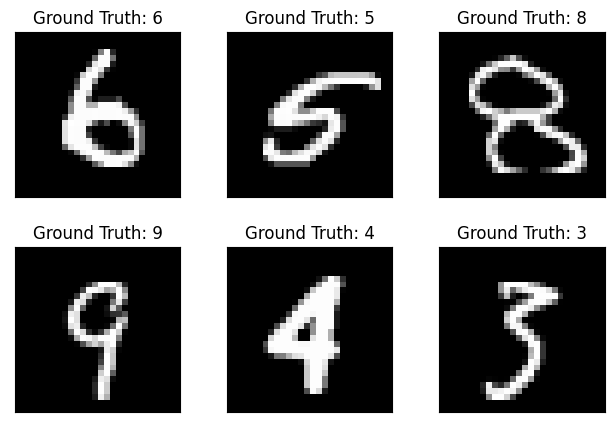

In [87]:
num_train_data = 5000
num_test_data = 1000

mnist = MNIST(train_batch_size=num_train_data, test_batch_size=num_test_data)
train_data, test_data = mnist.set_data()
train_loader, test_loader = mnist.load_data(train_data, test_data)
mnist.print_example(test_loader)

In [88]:
X_train, y_train = next(iter(train_loader))
X_train = X_train.reshape(num_train_data, -1).numpy()
y_train = y_train.unsqueeze(1).numpy()

X_test, y_test = next(iter(test_loader))
X_test = X_test.reshape(num_test_data, -1).numpy()
y_test = y_test.unsqueeze(1).numpy()

print('Sampling Training & Test Data.....\n')
print('Training data shape: {}'.format(X_train.shape))
print('Training labels shape: {}'.format(y_train.shape))
print('Test data shape: {}'.format(X_test.shape))
print('Test labels shape: {}'.format(y_test.shape))

Sampling Training & Test Data.....

Training data shape: (5000, 784)
Training labels shape: (5000, 1)
Test data shape: (1000, 784)
Test labels shape: (1000, 1)


## Model Training & Evaluation

In [90]:
model = KNN()
model.train(X_train, y_train)

In [91]:
"""
Model usage for test.
"""
K = 15
y_pred = model.inference(X_test, k=K, dist_metric='l2')
acc = model.evaluate(y_test, y_pred)
print("Accuarcy:", acc)

Accuarcy: 0.928


## Experiments

In [92]:
# Modify the number of k's and metrics to try as you want
num_ks = 50
metrics = ['dot', 'cos', 'l2']

In [94]:
# Run experiments
print_k_interval = 5
result = dict(zip(metrics, [[] for _ in range(len(metrics))]))
for metric in metrics:
    print("running KNN with {} distance metric".format(metric))
    for k in range(1, num_ks+1):
        if k % print_k_interval==0:
            print("    processing... k={:3d}".format(k))
        y_pred = model.inference(X_test, k=k, dist_metric=metric)
        acc = model.evaluate(y_test, y_pred)
        result[metric].append(acc)
    print()

running KNN with dot distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30
    processing... k= 35
    processing... k= 40
    processing... k= 45
    processing... k= 50

running KNN with cos distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30
    processing... k= 35
    processing... k= 40
    processing... k= 45
    processing... k= 50

running KNN with l2 distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30
    processing... k= 35
    processing... k= 40
    processing... k= 45
    processing... k= 50



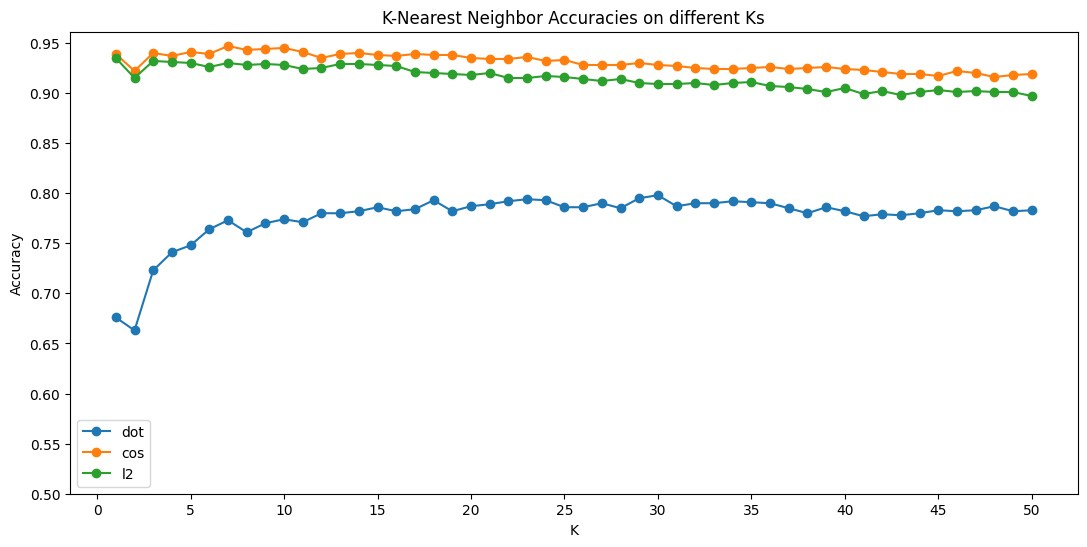

In [95]:
# Visualize the result
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1,1,1)

x_axis = np.arange(1, num_ks+1, 1)
for i, metric in enumerate(metrics):
    ax.plot(x_axis, result[metric], 'o-', label = metric)

ax.set(title="K-Nearest Neighbor Accuracies on different Ks")
ax.set(xlabel='K', ylabel='Accuracy')
ax.set(xticks=np.arange(0, num_ks+1,5), yticks=np.arange(0.5,1.0,0.05))
ax.legend()
plt.show()

In [ ]:
### 
# Question (d)
# Briefly report what you observe in the plot above.
###

Cosine Similarity를 통해 계산한 MNIST Dataset의 train set과 test set내 각각의 그림에 대한 학습이 3가지 유사도 기법 중 가장 높게 나타난 것으로 보인다. Dot Similarity의 경우 다른 두 유사도 metric 들에 비해서 정확도가 0.2가량 낮게 계산되었으며 Negative least squares과 Cosine similarity의 경우 서로 값에서 큰 차이가 나타나지 않는 것으로 보인다. 고려해야 하는 이웃의 수 (k) 값의 경우 그 값이 증가할 수록 정확도가 일정 수준까지는 증가하지만, k값이 계속 증가할경우 overfitting 으로 특정 k값 부터는 정확도가 오히려 감소하게 되는 것으로 보인다. Cosine Similarity의 차원에서 k=7일 때 test data에 대한 분류 정확도가 가장 높게 나타나는 것으로 보인다는 점에서 이웃의 갯수가 많다고 해서 반드시 정확도가 높아지는 것은 아닌 것으로 보인다. MNIST와 같이 간단한 그림의 경우, 색이 흑백으로 단순하고 데이터의 크기가 크지 않다는 점에서 딥러닝 기법들을 사용하지 않더라도 예측 정확도가 충분히 높게 나타나고 있는 것으로 보인다. 특히, train 데이터가 500개일 때보다 5000개일 때 정확도 값이 더 높게 계산되어진다는 점에서 knn의 경우 matching 되는 데이터의 갯수가 클 때 충분히 높은 정확도를 보인다. 다만, 분류 모델에 train set 그림 전부를 포함해야 한다는 점에서 모형의 용량이 과도하게 커진다는 근본적 한계가 존재하므로 유의해야 한다.  